In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('earthquake_dataset.csv')

In [3]:
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,1


In [4]:
data['Richter Category'] = 0
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,0


In [5]:
data[data['Mag'] > 7.0]

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
1110,3,4,758,23.8,121.7,0,7.5,334,257,12,3905,0


In [16]:
def getRichter(magnitude):
    if (magnitude <= 2.9):
        return 0
    elif (magnitude <= 3.9):
        return 1
    elif (magnitude <= 4.9):
        return 2
    elif (magnitude <= 5.9):
        return 3
    elif (magnitude <= 6.9):
        return 4
    elif (magnitude <= 7.9):
        return 5
    else:
        return 6

In [17]:
for index, row in data.iterrows():
    data.loc[index, 'Richter Category'] = getRichter(row['Mag'])
data.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,1


In [18]:
data.describe()  #display the summarized info of dataset

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category
count,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000
mean,14.431767,2.345543,1230.412642,10.028420,124.899381,28.091410,2.416224,37.751540,267.015883,57.754619,6802.970016,0.247164
std,8.563833,1.111057,749.904752,3.620895,2.371969,33.602533,0.711643,44.809418,142.661262,26.932841,2257.336497,0.533840
min,1.000000,1.000000,100.000000,1.930000,118.550000,0.000000,1.100000,0.000000,0.000000,0.000000,1005.000000,0.000000
25%,7.000000,1.000000,511.250000,8.150000,123.170000,9.000000,1.900000,11.000000,164.000000,31.000000,5107.000000,0.000000
50%,14.000000,2.000000,1222.000000,8.760000,126.120000,22.000000,2.300000,23.000000,242.000000,73.000000,8210.000000,0.000000
75%,21.000000,3.000000,1932.000000,11.830000,126.610000,32.000000,2.800000,51.000000,364.000000,81.000000,8311.000000,0.000000
max,31.000000,4.000000,2459.000000,23.800000,128.440000,543.000000,7.500000,472.000000,588.000000,88.000000,9811.000000,5.000000


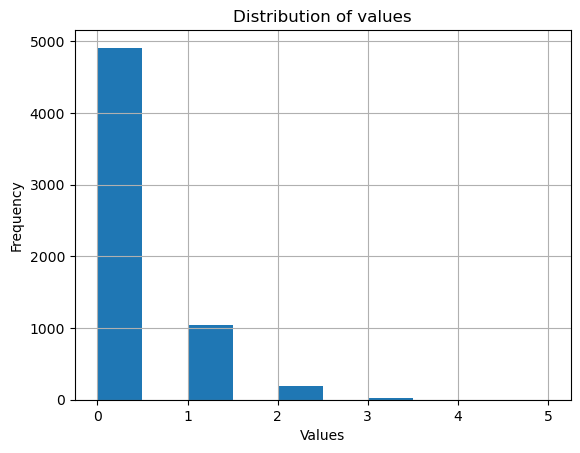

In [19]:
import matplotlib.pyplot as plt

data['Richter Category'].hist()  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

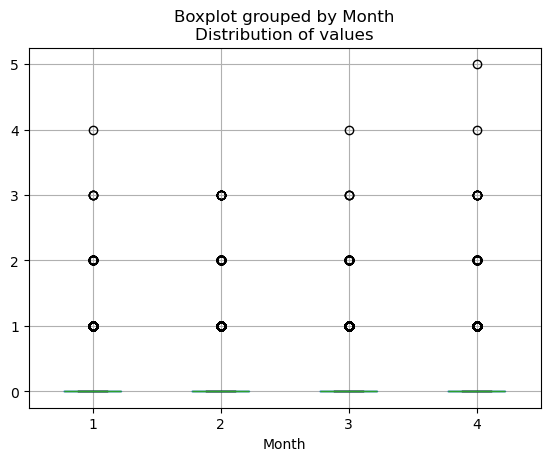

In [20]:
data.boxplot(column='Richter Category', by='Month')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [21]:
#from sklearn.preprocessing import StandardScaler
#numerical_features = ['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'Zip Code']
#for feature in numerical_features:
   # scaler = StandardScaler()
    #data[[feature]] = scaler.fit_transform(data[[feature]])
#data.head()

data.to_csv('earthquake_dataset.csv', index=False)

In here we can see that most of our earthquakes are very micro ones that does not really straightforwardly affect people

In [22]:
X = data.drop(['Richter Category', 'Mag', 'Depth(km)', 'City', 'Province', 'Distance(km)'], axis=1)
y = data['Richter Category']

In [23]:
X.columns  #display X columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'Zip Code'], dtype='object')

In [24]:
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Zip Code
0,25,4,1919,8.50,124.42,9019
1,25,4,1813,18.13,120.81,2911
2,25,4,1808,14.71,121.78,2412
3,25,4,1706,5.64,126.33,8014
4,25,4,1647,8.07,126.71,8312


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Richter Category, dtype: int64

In [26]:
X.shape

(6170, 6)

In [27]:
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Zip Code
0,25,4,1919,8.50,124.42,9019
1,25,4,1813,18.13,120.81,2911
2,25,4,1808,14.71,121.78,2412
3,25,4,1706,5.64,126.33,8014
4,25,4,1647,8.07,126.71,8312


In [28]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [29]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((4319, 6), (4319,))

In [30]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((1851, 6), (1851,))

In [31]:
X_train.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Zip Code
450,16,4,1604,8.27,126.58,8310
619,13,4,2005,8.58,126.28,8309
1288,29,1,1412,7.76,125.70,1234
1928,16,1,2118,8.62,126.87,8310
1247,31,1,344,19.92,121.71,3904


In [32]:
y_train.head()

450     0
619     0
1288    0
1928    0
1247    0
Name: Richter Category, dtype: int64

In [33]:
X_test.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Zip Code
5083,21,3,437,6.55,125.93,8210
3847,14,2,1559,8.31,126.62,8310
4528,1,2,2032,13.40,121.75,4900
2526,7,1,1853,8.74,126.40,8306
5349,17,3,105,12.85,122.97,3519


In [34]:
y_test.head()

5083    0
3847    2
4528    0
2526    0
5349    0
Name: Richter Category, dtype: int64

In [35]:
X_train.isnull().sum()  #check x_train for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Zip Code          0
dtype: int64

In [36]:
y_train.isnull().sum()  #check y_train for null values

0

In [37]:
X_test.isnull().sum()  #check x_test for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Zip Code          0
dtype: int64

In [38]:
y_test.isnull().sum()  #check y_test for null values

0

In [39]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [40]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [41]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [42]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [43]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [44]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [45]:
#import libraries for SVM
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()     
ada_boost.fit(X_train,y_train)

#make predictions and store data for later
y_pred_ada = ada_boost.predict(X_test)

#get the accuracy score
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)

In [46]:
#import libraries for SVM
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()     
bg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_bg = bg.predict(X_test)

#get the accuracy score
acc_bg = round(accuracy_score(y_test,y_pred_bg)*100,2)

In [47]:
#import libraries for SVM
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()     
etc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_etc = etc.predict(X_test)

#get the accuracy score
acc_etc = round(accuracy_score(y_test,y_pred_etc)*100,2)

In [48]:
#import libraries for SVM
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()     
hgb.fit(X_train,y_train)

#make predictions and store data for later
y_pred_hgb = hgb.predict(X_test)

#get the accuracy score
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)

In [49]:
#import libraries for SVM
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()     
mlpc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_mlpc = mlpc.predict(X_test)

#get the accuracy score
acc_mlpc = round(accuracy_score(y_test,y_pred_mlpc)*100,2)

In [50]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
bnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_bnb = bnb.predict(X_test)  

#get the accuracy score
acc_bnb = round(accuracy_score(y_test,y_pred_bnb)*100,2)

In [51]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier() 
ext.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_ext = ext.predict(X_test)  

#get the accuracy score
acc_ext = round(accuracy_score(y_test,y_pred_ext)*100,2)

In [52]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dc = dc.predict(X_test)  

#get the accuracy score
acc_dc = round(accuracy_score(y_test,y_pred_dc)*100,2)

In [53]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes','Support Vector Machine', 'Ada Boost', 
              'Bagging Classifier', 'Extra Trees', 'Hist Gradient Boosting',
              'MLPC Classifier', 'Bernoulli NB', 'Extra Tree Classifier', 'Dummy Classifier'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_svm, acc_ada, acc_bg, acc_etc, acc_hgb, acc_mlpc, acc_bnb, acc_ext, acc_dc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
80.55,Gradient Boosting
79.74,Ada Boost
79.58,Random Forest
79.04,MLPC Classifier
79.04,Bernoulli NB
79.04,Dummy Classifier
78.98,Naive Bayes
78.98,Support Vector Machine
78.39,Bagging Classifier


Due to Gradient Boosting having the highest accuracy, we will choose this as our main classifier model.

In [54]:
y_pred_gb  #display prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_test  #display actual values

5083    0
3847    2
4528    0
2526    0
5349    0
       ..
3807    0
6100    2
440     0
2689    1
4999    0
Name: Richter Category, Length: 1851, dtype: int64

In [64]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_gb)).mean()
RMSE = (math.sqrt(MSE)) 
print(RMSE)

0.5631393059482137


In [63]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gb) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[1439   21    0    3    0]
 [ 264   49    4    4    1]
 [  44   10    3    2    0]
 [   6    1    0    0    0]
 [   0    0    0    0    0]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

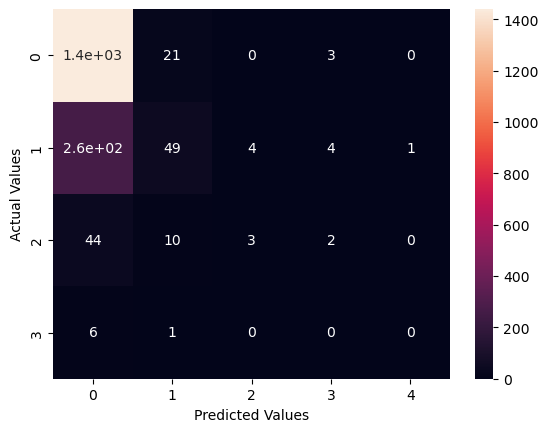

In [62]:
import seaborn as sns  #import package for plotting

#confusion matrix
cm = pd.crosstab(y_test, y_pred_gb, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)

In [72]:
to_predict = np.array([10, 5, 38, 8.82, 126.41, 8306]);
print(gnb.predict([[10, 5, 38, 8.82, 126.41, 8306]]))

[0]


C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV
from time import time
X.columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)', 'Zip Code'], dtype='object')

In [49]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [53]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [54]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy = {:0.4f} '.format(accuracy))
    return accuracy

In [57]:
base_model = RandomForestClassifier(n_estimators = 100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print("\n\n")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print("\n\n")
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.7996 



Model Performance
Accuracy = 0.8050 



Improvement of 0.68%.


The researchers achieve an improvement of 0.68%. This could be a significant benefit. We can further improve our results by using the grid search to focus on the most promising hyperparameters ranges found in random search.

In [58]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [100, 200 , 400, 1600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 400, 1600]},
             verbose=2)

In [60]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [61]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.8055 
Improvement of 0.74%.


# Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
# Create a based model
gb = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 84672 candidates, totalling 254016 fits


C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
127008 fits failed out of a total of 254016.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87276 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=2)

In [64]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.24545454545454548,
 'n_estimators': 10,
 'subsample': 0.85}

In [67]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 0.7904 


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score  # Assuming you want ROC AUC for evaluation

# Define the parameter grid for hyperparameter search
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create a Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)  # Set random state for reproducibility

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,
                                   scoring='accuracy',  # Use ROC AUC for scoring
                                   n_iter=75, cv=3, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [52]:
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 3, 'learning_rate': 0.01}


In [55]:
random_grid = random_search.best_estimator_
grid_accuracy = evaluate(random_grid, X_test, y_test)

Model Performance
Accuracy = 0.8055 


In [58]:
base_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
base_model.fit(X_train, y_train)
print(base_model.score(X_test, y_test))
random_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_depth=3, learning_rate=0.01)
random_model.fit(X_train, y_train)
print(random_model.score(X_test, y_test))

0.8055105348460292
0.8055105348460292


In [11]:
X.columns

NameError: name 'X' is not defined